In this experiment, we discuss hierarchical clustering methods. Heirarchial clustering
algorithms build nested clusters by repeatedly merging two clusters in the bottom up
approach and successively splitting a cluster into two in the top-down approach. This
hierarchy of clusters is represented as a dendrogram. Dendrogram is a tree diagram
popularly used to illustrate the arrangement of the heirarchy of clusters produced by
hierarchical clustering algorithms.
MNIST is a classic dataset of handwritten images. It is a popular dataset used for
benchmarking classification algorithms.
Hierarchical clustering generally fall into two types:
Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster,
and pairs of clusters are merged as one moves up the hierarchy. Divisive: This is a "top
down" approach: all observations start in one cluster, and splits are performed
recursively as one moves down the hierarchy.

Exercise 1 : Import the data set and visualise the clusters formed. Use from sklearn
import datasets to import mnist data set and visualise the clusters formed

Exercise 2 : Use SpectralEmbedding to Embed in 2D and plot using agglomerative
clustering

Exercise 3 : The linkage criteria determines the distance metric used for the merge
strategy:

Use ward which minimizes the sum of squared differences within all clusters. It is
a variance-minimizing approach and in this sense is similar to the k-means
objective function but addressed with an agglomerative hierarchical approach.
Also check with other linkage criteria.

Exercise 4 : Plot dendogram

Exercise 5 : If we define the clusters to be the set of points with distance between each
other equal to 20, visualise how many number of clusters will be obtained?

In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [22]:
X_train=X_train[0:6000]

In [23]:
X=[]
for i in range(len(X_train)):
    X.append(X_train[i].flatten())
X=np.array(X)

In [24]:
X.shape

(6000, 784)

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [26]:
df=pd.DataFrame(pca_result,columns=['ax1','ax2'])

Text(0.5,1,'Dimensionality reduced version of MNIST digits')

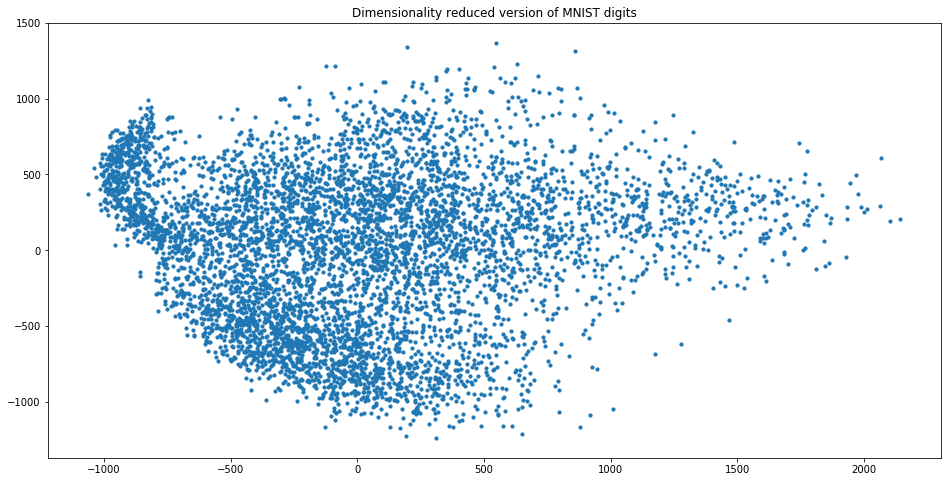

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(df['ax1'],df['ax2'],s=10)
plt.title('Dimensionality reduced version of MNIST digits')

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [30]:
Z = linkage(df_red.values, 'ward')

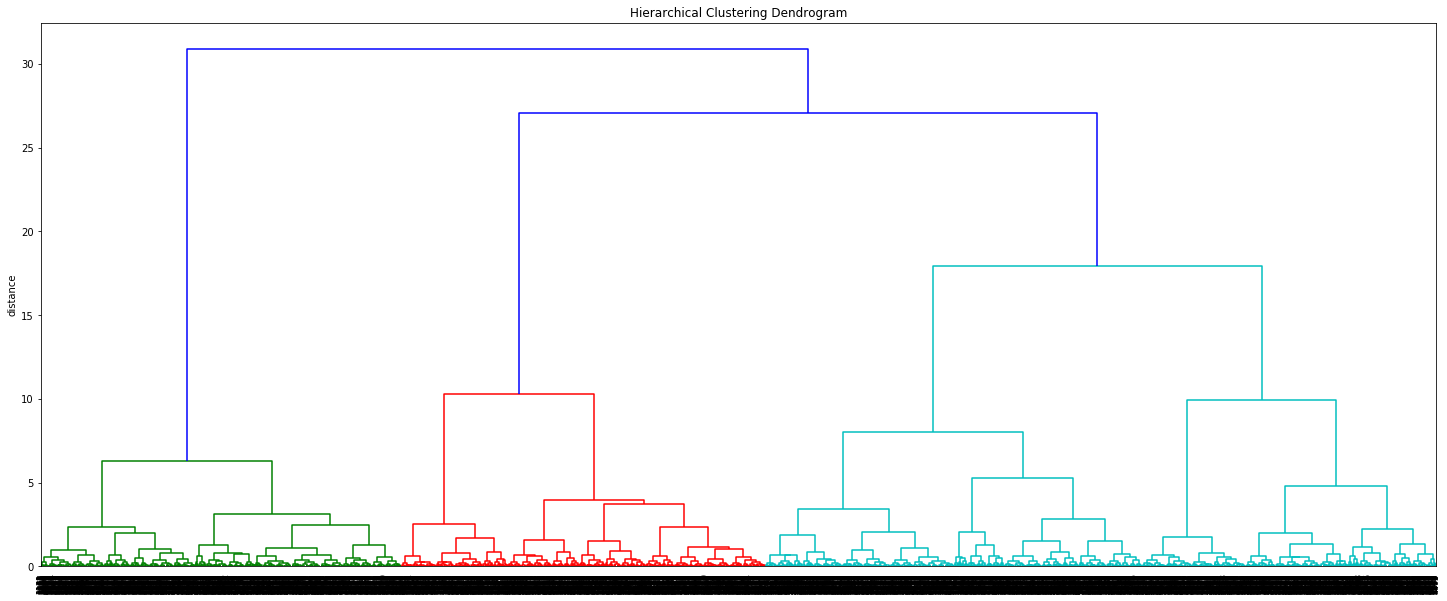

In [31]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [34]:
assign=fcluster(Z,t=5,criterion='maxclust')
assign

array([3, 2, 1, ..., 4, 3, 1], dtype=int32)

Text(0.5,1,'Dimensionality reduced version of MNIST digits')

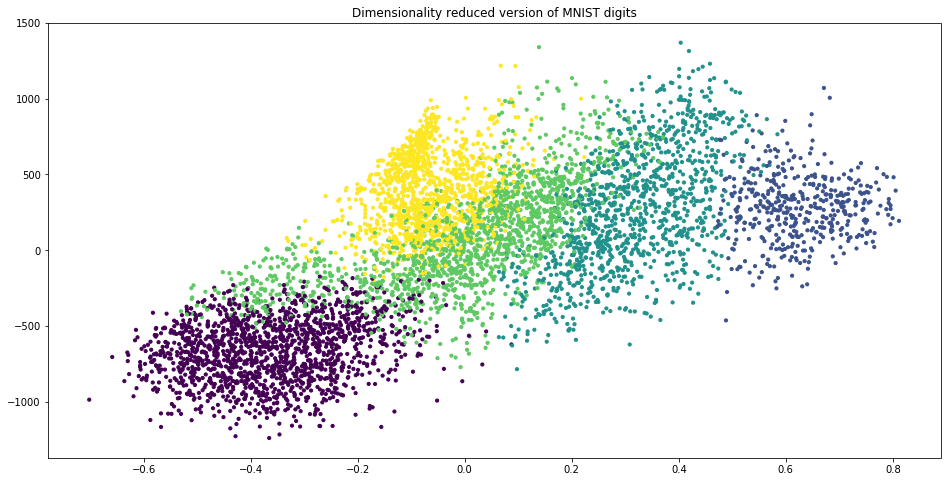

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(df_red['ax1'],df['ax2'],c=assign,s=10)
plt.title('Dimensionality reduced version of MNIST digits')

In [ ]:
assign2=fcluster(Z,t=20,criterion='distance')
assign2

In [ ]:
assign2

In [28]:
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
X_red

array([[ 0.1977579 ,  0.01788963],
       [ 0.75832212, -0.44048398],
       [-0.18443844, -0.17119093],
       ...,
       [ 0.05532697,  0.15194331],
       [ 0.38600139, -0.14230132],
       [-0.41762613, -0.36585128]])

Text(0.5,1,'Dimensionality reduced version of MNIST digits')

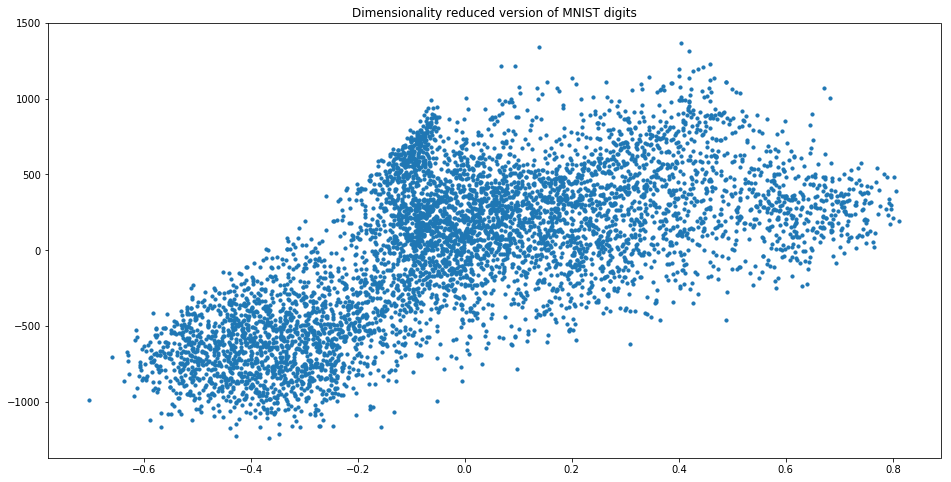

In [29]:
df_red=pd.DataFrame(data=X_red,columns=['ax1','ax2'])
plt.figure(figsize=(16,8))
plt.scatter(df_red['ax1'],df['ax2'],s=10)
plt.title('Dimensionality reduced version of MNIST digits')

## SKlearn Implementation

In [ ]:
from sklearn import manifold, datasets
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
np.random.seed(0)

In [ ]:
def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),.3 * np.random.normal(size=2),mode='constant').ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

In [ ]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [ ]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    print("%s " % (linkage))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()